# Notebook for generating plots of trained agents

This code will load the results for the specified experiments, generate plots, and save them in the `experiments_dir` directory

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import pandas as pd

In [2]:
plt.rc("font", family="serif")
plt.rc("xtick", labelsize="small")
plt.rc("ytick", labelsize="small")
plt.rc("legend", fontsize="small")
plt.rc("axes", labelsize="small")

* Set the directory in which all the experiments to be plotted together are stored.
* Set the list of subdirs (experiments) you want to include in the plots

In [9]:
!ls $SCRATCH/elias_expe/2_agents/cooperative/modified_reward/6_landmarks/naming_game



0_5discount			  train-20167_4294967294.slurm.err
2022-10-05_16-20-20vb4p7o7w	  train-20167_4294967294.slurm.out
2022-10-05_16-20-262uiwtdpk	  train-20190_4294967294.slurm.err
2022-10-05_16-20-268svpzuxq	  train-20190_4294967294.slurm.out
2022-10-05_16-20-26vp5h_kex	  train-20210_4294967294.slurm.err
2022-10-05_16-20-26y6z0i52j	  train-20210_4294967294.slurm.out
2022-10-06_13-50-03514syyz7	  train-2062518_0.slurm.err
2022-10-06_14-01-17rq3iolu8	  train-2062518_0.slurm.out
2022-10-06_14-07-269k6rcdwx	  train-2062518_1.slurm.err
2022-10-06_14-15-096a8n9qkw	  train-2062518_1.slurm.out
2022-10-06_14-22-00o9f5ryf0	  train-2062518_2.slurm.err
2022-10-07_15-19-38c9zsz2h4	  train-2062518_2.slurm.out
2022-10-07_15-28-00qnvvlaz4	  train-2062518_3.slurm.err
2022-10-07_15-30-58duu4b5h7	  train-2062518_3.slurm.out
2022-10-07_15-34-162t0p5hzo	  train-2062518_4.slurm.err
2022-10-07_15-40-31knt68von	  train-2062518_4.slurm.out
2022-10-10_12-15-53y6evn98_	  train-2076446_4294967294.slurm.err
2022-10-10_

ls: cannot access '/gpfsscratch/rech/imi/uzw47io/elias_expe/2_agents/centralized/all/modified_reward/6_landmarks/naming_game': No such file or directory


In [3]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/6_landmarks/"
list_of_experiments = ["centralized","independent","naming_game_30msg_t30_a10","50align"]

In [11]:


experiments_dir = os.environ["SCRATCH"]+"/elias_expe/2_agents/cooperative/modified_reward/3_landmarks/"
list_of_experiments = ["naming_game_t30_a10"]

In [4]:
results = {}
for experiment in list_of_experiments:
    subdir = os.path.join(experiments_dir, experiment)
    eval_reward = pd.DataFrame()
    train_reward = pd.DataFrame()
    episode_len = pd.DataFrame()
    alignment = pd.DataFrame()
    train_x = []
    eval_x = []
    ctr=0
    for j, experiment_name in enumerate(os.listdir(subdir)):
        
        #print(subdir+"/"+experiment_name)
        if(os.path.isdir(subdir+"/"+experiment_name)):
          
            ctr+=1
            if(experiment_name[:5]!="p_est" and experiment_name[:5]!="0_5di"):
            
                if( (experiment_name[9]=="5" ) or experiment!="naming_game"):
                    print(experiment_name)

                    r = []
                    r_t = []
                    l = []
                    x_ = []
                    a = []
                    y_ = []
                    result_raw = open(os.path.join(subdir, experiment_name, "result.json"), "r")

                    for result in result_raw:
                        dump = json.loads(result)
                        #if(ctr>5):
                            #print(dump.keys())
                        a.append(dump["custom_metrics"].get("goal_alignment_mean"))
                        y_.append(dump["timesteps_total"])
                        r_t.append(dump["episode_reward_mean"])

                        metrics = dump.get("evaluation")
                        if metrics is not None:
                            custom = metrics.get("custom_metrics")
                            x_.append(dump["timesteps_total"])
                            r.append(metrics["episode_reward_mean"])
                            l.append(metrics["episode_len_mean"])

                    eval_reward = pd.concat(
                        [eval_reward, pd.DataFrame(r)], ignore_index=True, axis=1
                    )
                    episode_len = pd.concat(
                        [episode_len, pd.DataFrame(l)], ignore_index=True, axis=1
                    )
                    alignment = pd.concat([alignment, pd.DataFrame(a)], ignore_index=True, axis=1)
                    train_reward = pd.concat(
                        [train_reward, pd.DataFrame(r_t)], ignore_index=True, axis=1
                    )


                    if len(x_) > len(eval_x):
                        eval_x = x_
                    if len(y_) > len(train_x):
                        train_x = y_
    results[experiment] = {
        "eval_reward": eval_reward,
        "train_reward": train_reward,
        "episode_len": episode_len,
        "alignment": alignment,
        "train_x": train_x,
        "eval_x": eval_x,
    }

2022-10-05_16-32-13wpu4jybe
2022-10-05_16-32-5645itgzkx
2022-10-05_16-32-56k8zzqzg7
2022-10-05_16-32-563b4wqavn
2022-10-05_16-32-56ctep9gtn
2022-10-05_16-27-483t5ljd3a
2022-10-05_16-27-48akntw9fp
2022-10-05_16-27-488vn8uoj5
2022-10-05_16-27-48y8cz9kv8
2022-10-06_16-13-41lqqpbfje
2022-10-05_16-27-48g651cfxl
2022-10-06_16-10-58la0rjvl6
2022-10-17_16-01-16s4p4yg8u
2022-10-17_16-01-14bfynpbi7
2022-10-17_16-01-13dqqjntxb
2022-10-17_16-01-142pvfn2tk
2022-10-17_16-01-16o1m32xxn
2022-10-16_23-53-04kkgnt6zh
2022-10-16_23-53-04r8hekp43
2022-10-16_23-53-01437clmzt
2022-10-16_23-53-01yx4b0duf
2022-10-16_23-53-04jqqjju5v


Training plots

In [15]:
for label, result in results.items():
    print(result["train_x"])
    print(len(result["train_x"]))
    print(result["train_reward"].mean(axis=1))

[60000, 120000, 180000, 240000, 300000, 360000, 420000, 480000, 540000, 600000, 660000, 720000, 780000, 840000, 900000, 960000, 1020000, 1080000, 1140000, 1200000, 1260000, 1320000, 1380000, 1440000, 1500000, 1560000, 1620000, 1680000, 1740000, 1800000, 1860000, 1920000, 1980000, 2040000, 2100000, 2160000, 2220000, 2280000, 2340000, 2400000, 2460000, 2520000, 2580000, 2640000, 2700000, 2760000, 2820000, 2880000, 2940000, 3000000, 3060000, 3120000, 3180000, 3240000, 3300000, 3360000, 3420000, 3480000, 3540000, 3600000, 3660000, 3720000, 3780000, 3840000, 3900000, 3960000, 4020000, 4080000, 4140000, 4200000, 4260000, 4320000, 4380000, 4440000, 4500000, 4560000, 4620000, 4680000, 4740000, 4800000, 4860000, 4920000, 4980000, 5040000, 5100000, 5160000, 5220000, 5280000, 5340000, 5400000, 5460000, 5520000, 5580000, 5640000, 5700000, 5760000, 5820000, 5880000, 5940000, 6000000, 6060000, 6120000, 6180000, 6240000, 6300000, 6360000, 6420000, 6480000, 6540000, 6600000, 6660000, 6720000, 6780000,

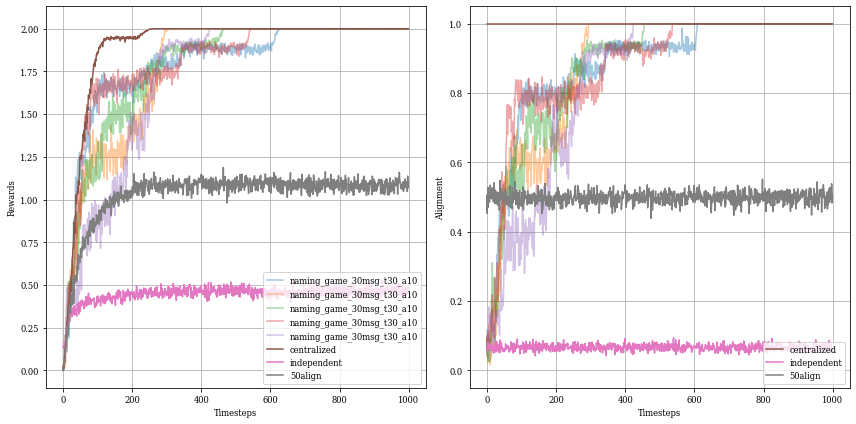

In [11]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)
for label, result in results.items():
    if( label=="naming_game_30msg_t30_a10"):
        plt.subplot(121)
        plt.plot( result["train_reward"][:slice],alpha=0.4,label=label)
   
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["alignment"][:slice],alpha=0.4)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1


        
for label, result in results.items():
    if( label!="naming_game_30msg_t30_a10"):
        plt.subplot(121)
        plt.plot( result["train_reward"][:slice].mean(axis=1), label=label)
        plt.fill_between(
            result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
            result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["alignment"][:slice].mean(axis=1), label=label)
        plt.fill_between(
            result["alignment"].mean(axis=1) - result["alignment"].std(axis=1),
            result["alignment"].mean(axis=1) + result["alignment"].std(axis=1),
            alpha=0.4,
        )
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1


plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

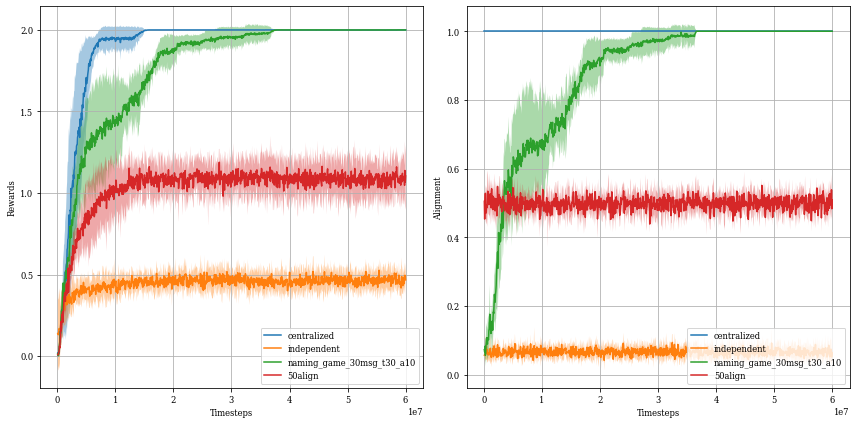

In [10]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")
slice=1000

i = 1
n_exp = len(results)
for label, result in results.items():
    
    plt.subplot(121)
    plt.plot(result["train_x"][:slice], result["train_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["train_reward"][:slice].mean(axis=1) - result["train_reward"][:slice].std(axis=1),
        result["train_reward"][:slice].mean(axis=1) + result["train_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["train_x"][:slice], result["alignment"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"][:slice],
        result["alignment"][:slice].mean(axis=1) - result["alignment"][:slice].std(axis=1),
        result["alignment"][:slice].mean(axis=1) + result["alignment"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

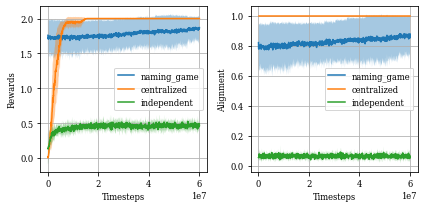

In [7]:
plt.figure(figsize=(6, 3))
plt.ylabel("Reward")


i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["train_x"], result["train_reward"].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"],
        result["train_reward"].mean(axis=1) - result["train_reward"].std(axis=1),
        result["train_reward"].mean(axis=1) + result["train_reward"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["train_x"], result["alignment"].mean(axis=1), label=label)
    plt.fill_between(
        result["train_x"],
        result["alignment"].mean(axis=1) - result["alignment"].std(axis=1),
        result["alignment"].mean(axis=1) + result["alignment"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Alignment")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

Eval plots

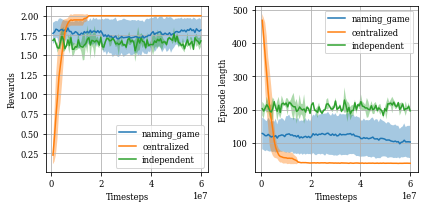

In [7]:
plt.figure(figsize=(6, 3))

i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"], result["eval_reward"].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"],
        result["eval_reward"].mean(axis=1) - result["eval_reward"].std(axis=1),
        result["eval_reward"].mean(axis=1) + result["eval_reward"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"], result["episode_len"].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"],
        result["episode_len"].mean(axis=1) - result["episode_len"].std(axis=1),
        result["episode_len"].mean(axis=1) + result["episode_len"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

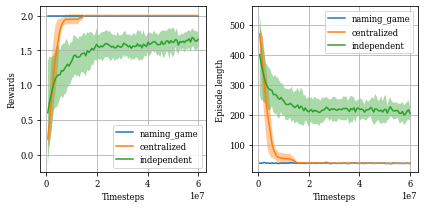

In [7]:
plt.figure(figsize=(6, 3))

i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"], result["eval_reward"].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"],
        result["eval_reward"].mean(axis=1) - result["eval_reward"].std(axis=1),
        result["eval_reward"].mean(axis=1) + result["eval_reward"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"], result["episode_len"].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"],
        result["episode_len"].mean(axis=1) - result["episode_len"].std(axis=1),
        result["episode_len"].mean(axis=1) + result["episode_len"].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

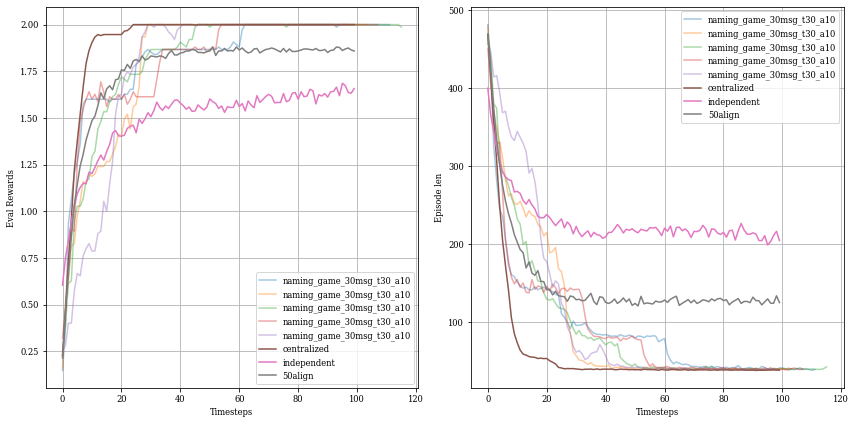

In [15]:
plt.figure(figsize=(12, 6))
plt.ylabel("Reward")

slice=1000
i = 1
n_exp = len(results)
for label, result in results.items():
    if(label=="naming_game_30msg_t30_a10"):
        plt.subplot(121)
        plt.plot( result["eval_reward"][:slice],alpha=0.4,label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Rewards")

        plt.subplot(122)
        plt.plot( result["episode_len"][:slice],alpha=0.4,label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Alignment")
        i += 1

        
for label, result in results.items():
    if(label!="naming_game_30msg_t30_a10"):
        plt.subplot(121)
        plt.plot( result["eval_reward"][:slice].mean(axis=1), label=label)
     
        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Eval Rewards")

        plt.subplot(122)
        plt.plot( result["episode_len"][:slice].mean(axis=1), label=label)

        if i == n_exp:
            plt.legend()
            plt.grid()
            plt.xlabel("Timesteps")
            plt.ylabel("Episode len")
        i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "train_plot.png"), dpi=300, bbox_inches='tight', transparent=True)

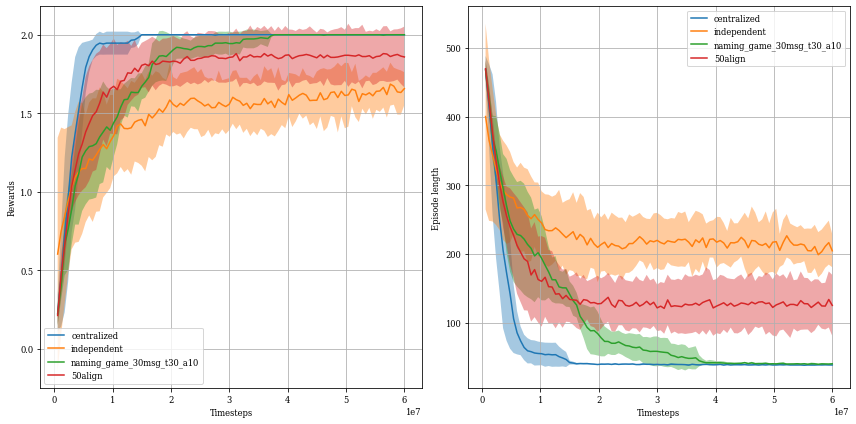

In [8]:
plt.figure(figsize=(12, 6))
slice=100
i = 1
n_exp = len(results)
for label, result in results.items():
    plt.subplot(121)
    plt.plot(result["eval_x"][:slice], result["eval_reward"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["eval_reward"][:slice].mean(axis=1) - result["eval_reward"][:slice].std(axis=1),
        result["eval_reward"][:slice].mean(axis=1) + result["eval_reward"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Rewards")

    plt.subplot(122)
    plt.plot(result["eval_x"][:slice], result["episode_len"][:slice].mean(axis=1), label=label)
    plt.fill_between(
        result["eval_x"][:slice],
        result["episode_len"][:slice].mean(axis=1) - result["episode_len"][:slice].std(axis=1),
        result["episode_len"][:slice].mean(axis=1) + result["episode_len"][:slice].std(axis=1),
        alpha=0.4,
    )
    if i == n_exp:
        plt.legend()
        plt.grid()
        plt.xlabel("Timesteps")
        plt.ylabel("Episode length")
    i += 1

plt.tight_layout()
# Uncomment this line for saving the plot
# plt.savefig(os.path.join(experiments_dir, "evaluation_plot.png"), dpi=300, bbox_inches='tight', transparent=True)